# SGD Regression

### Complexity: O(k.n.m)

n = samples

m = avg non-zero attributes per sample 

k = epochs

In [1]:
import pandas as pd

seed = 's1'

# Double Pole
base = '../../../../datalake/data_baseline/data/xdpole/initialconditions'
n_features = 6

ic = pd.read_csv(f"{base}/{seed}_run.csv")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

features = ic.columns[[i for i in range(n_features)]]
target = 'performance'
X, y = ic[features], ic[target]

start = 1000 * 10
X, y = X[start:], y[start:]
X = PolynomialFeatures(2).fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
import numpy as np
from utils import fit_cv
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV

grid = {
    'alpha': 10.0 ** -np.arange(1, 7),
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive', 'hinge'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
    'max_iter': [1, 2, 4, 16, 64, 256]
}
print(grid)

reg = GridSearchCV(SGDRegressor(), grid)

params = fit_cv(reg, (X_train, y_train), 'sgd')

{'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06]), 'loss': ['squared_loss', 'huber', 'epsilon_insensitive', 'hinge'], 'penalty': ['l2', 'l1', 'elasticnet'], 'learning_rate': ['constant', 'optimal', 'invscaling'], 'max_iter': [1, 2, 4, 16, 64, 256]}


In [4]:
from critic import evolution

def model(X=[], y=[]):
    m = SGDRegressor(**params, random_state=42)
    if len(X) + len(y) > 0:
        m.fit(X,y)
    return m

s, p, t = evolution(X, y, model, batch=100)
print(t)

28.124778818000323


<Axes: >

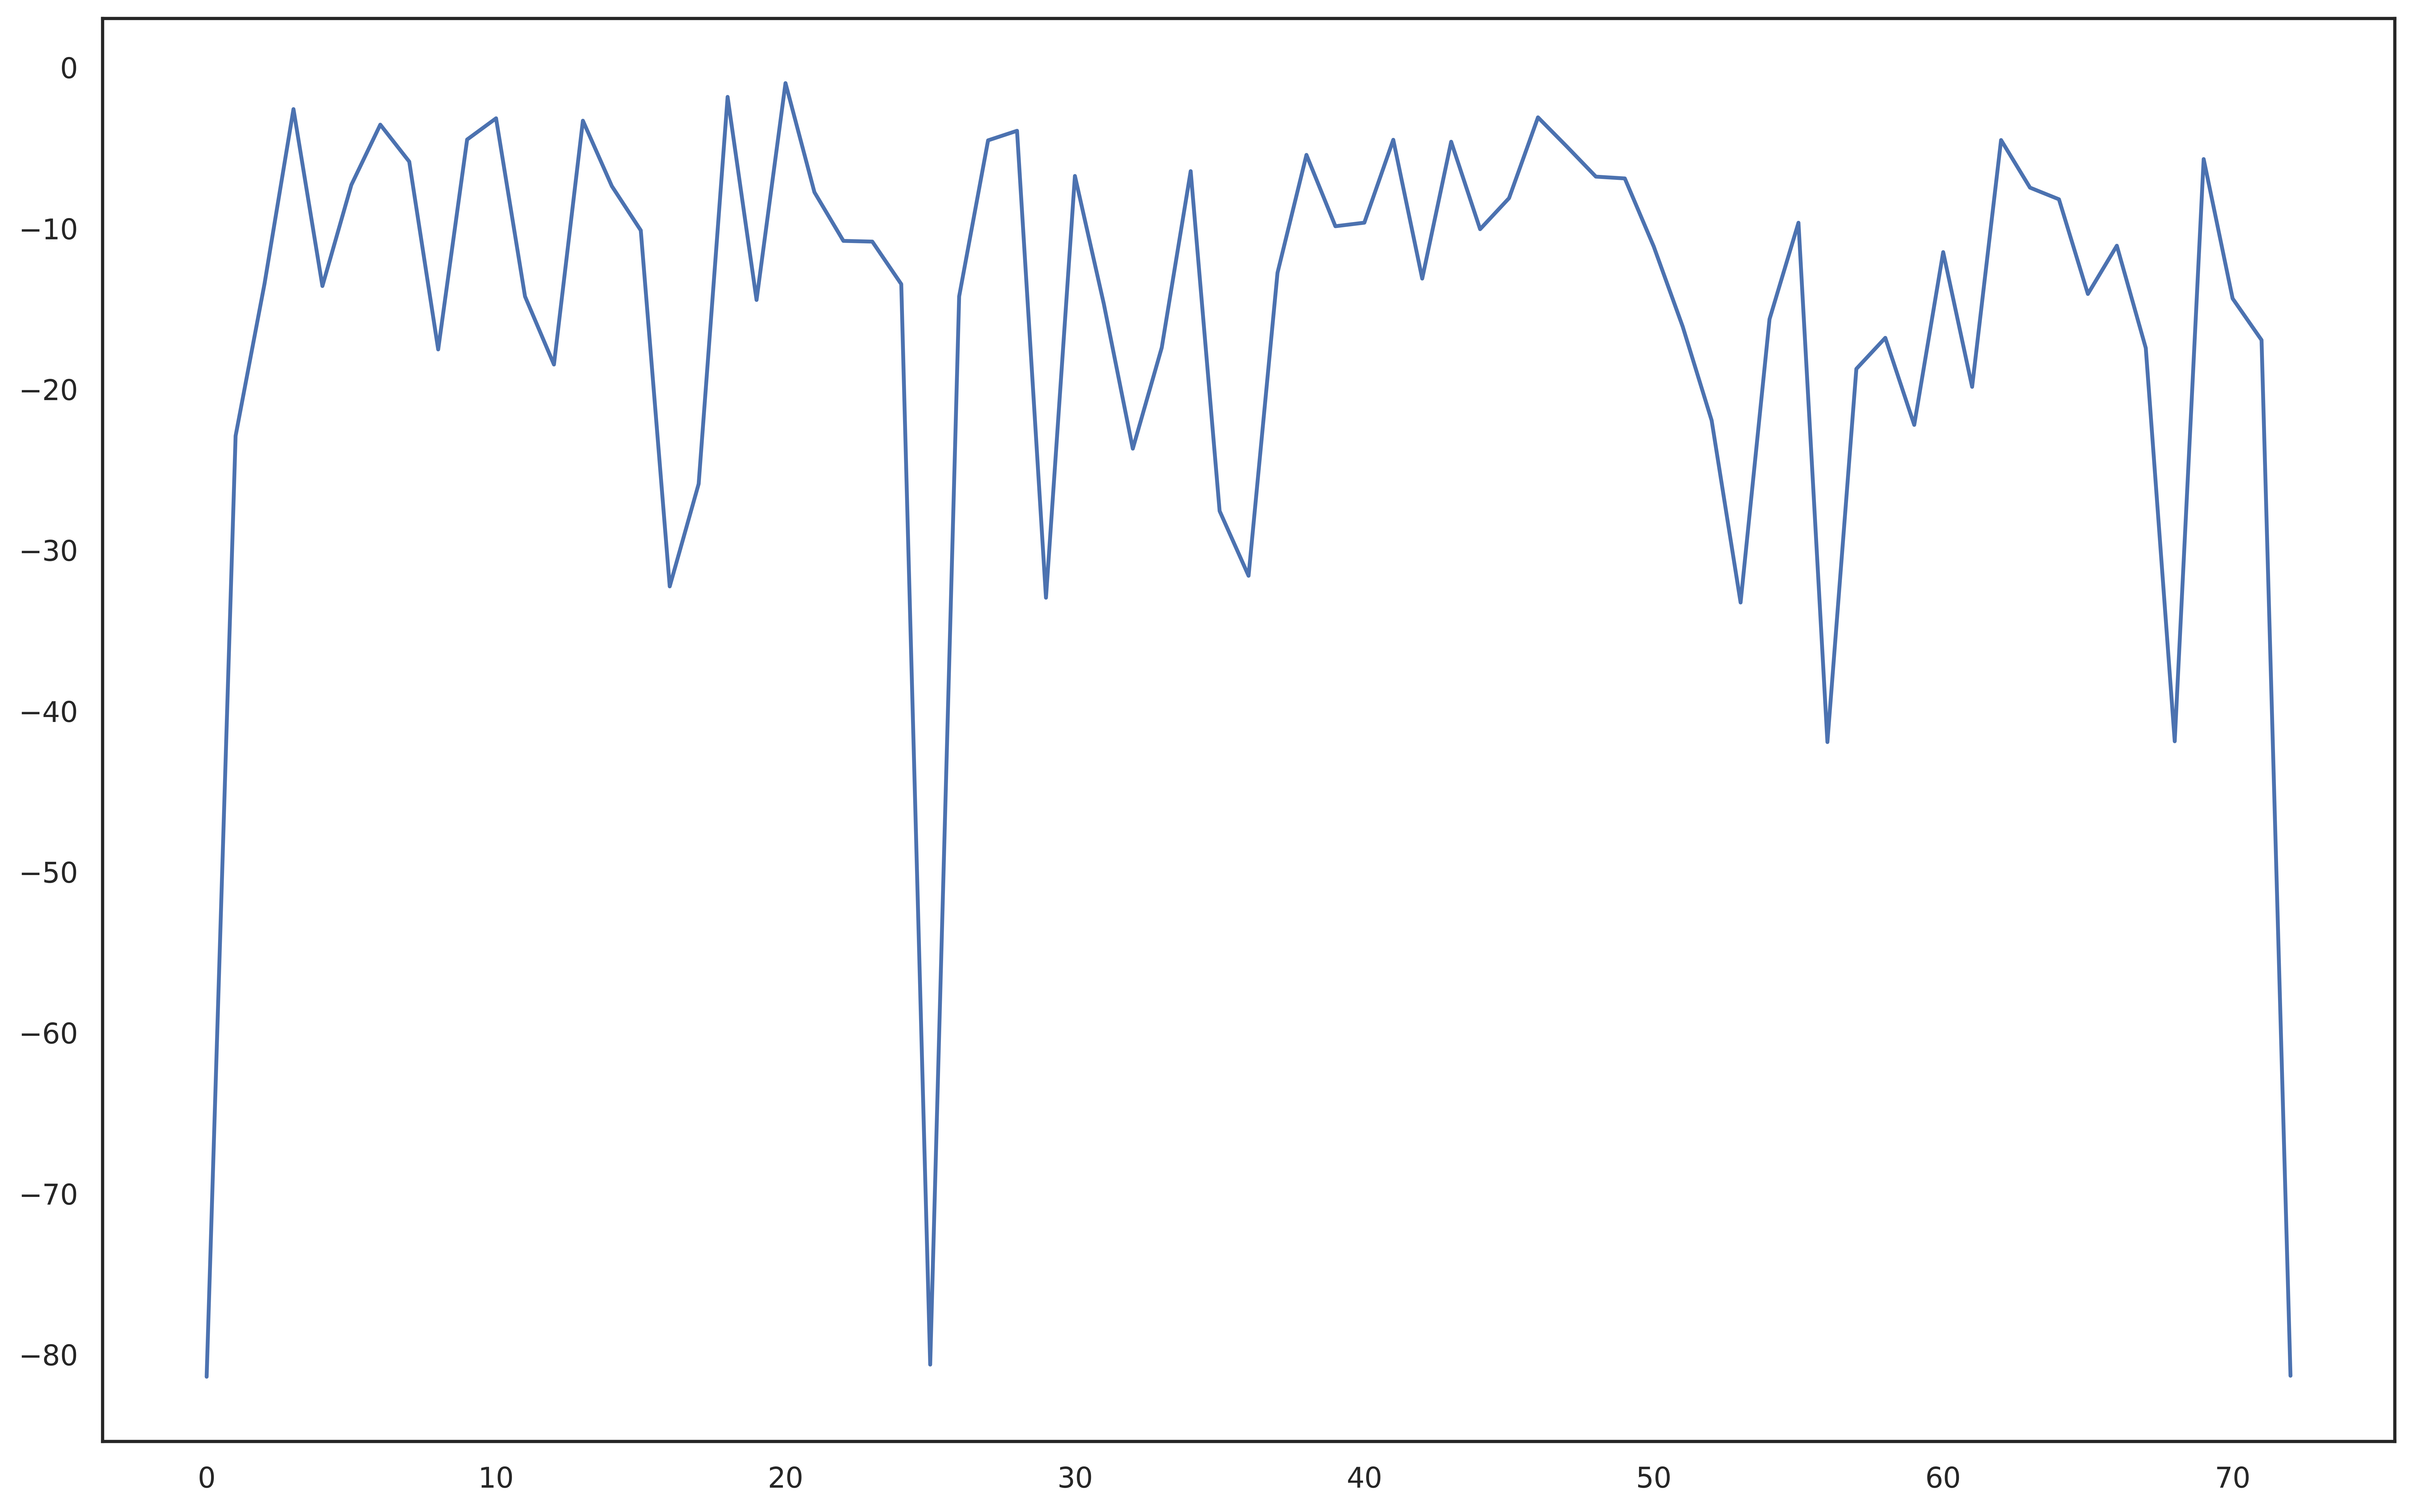

In [5]:
import seaborn as sns
from utils import graph_defaults
graph_defaults()

sns.lineplot(s)

<Axes: >

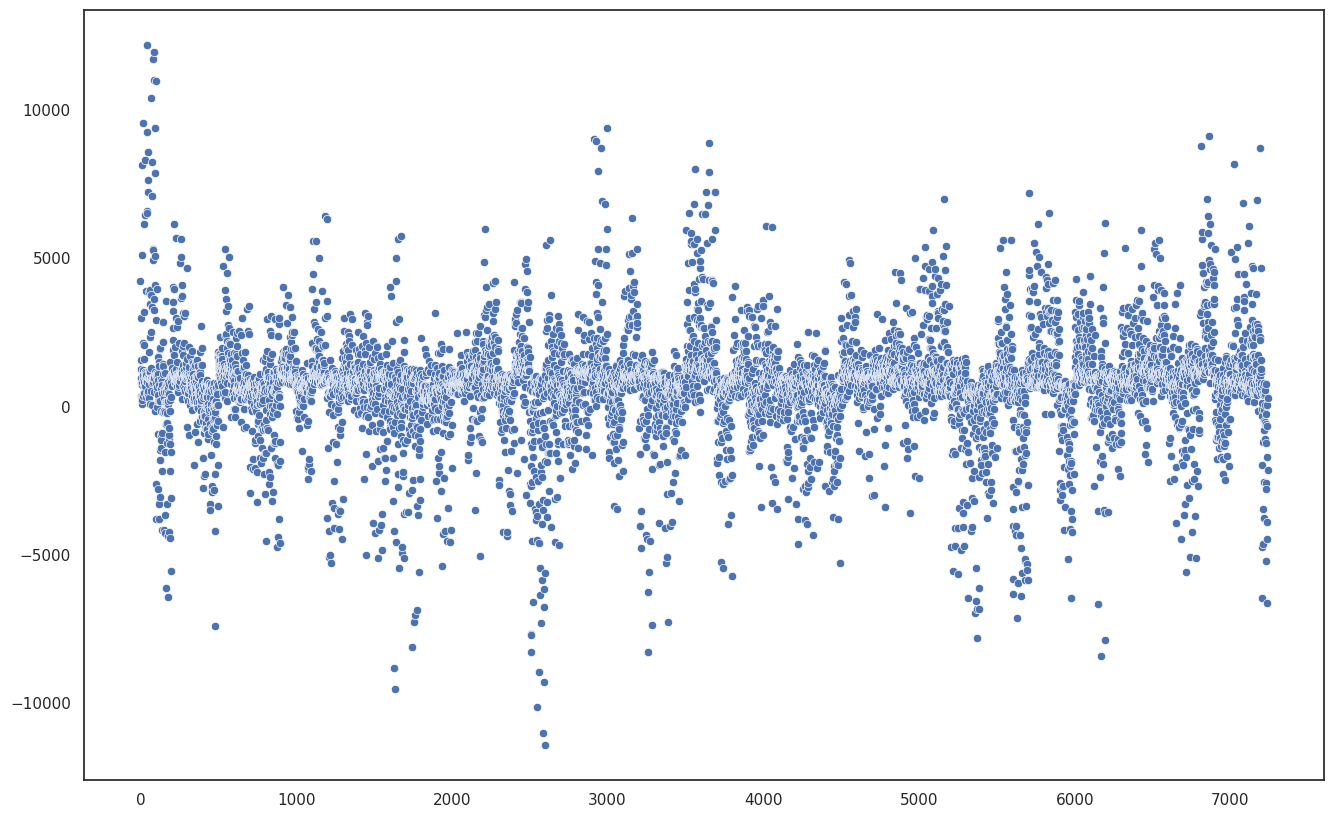

In [6]:
p = [yp for gen in p for yp in gen]

sns.scatterplot(p)

In [7]:
yt = [y[i] for i in range(start+1, len(y), 2)]

e = [p[i]/yt[i] for i in range(len(p))]

<Axes: >

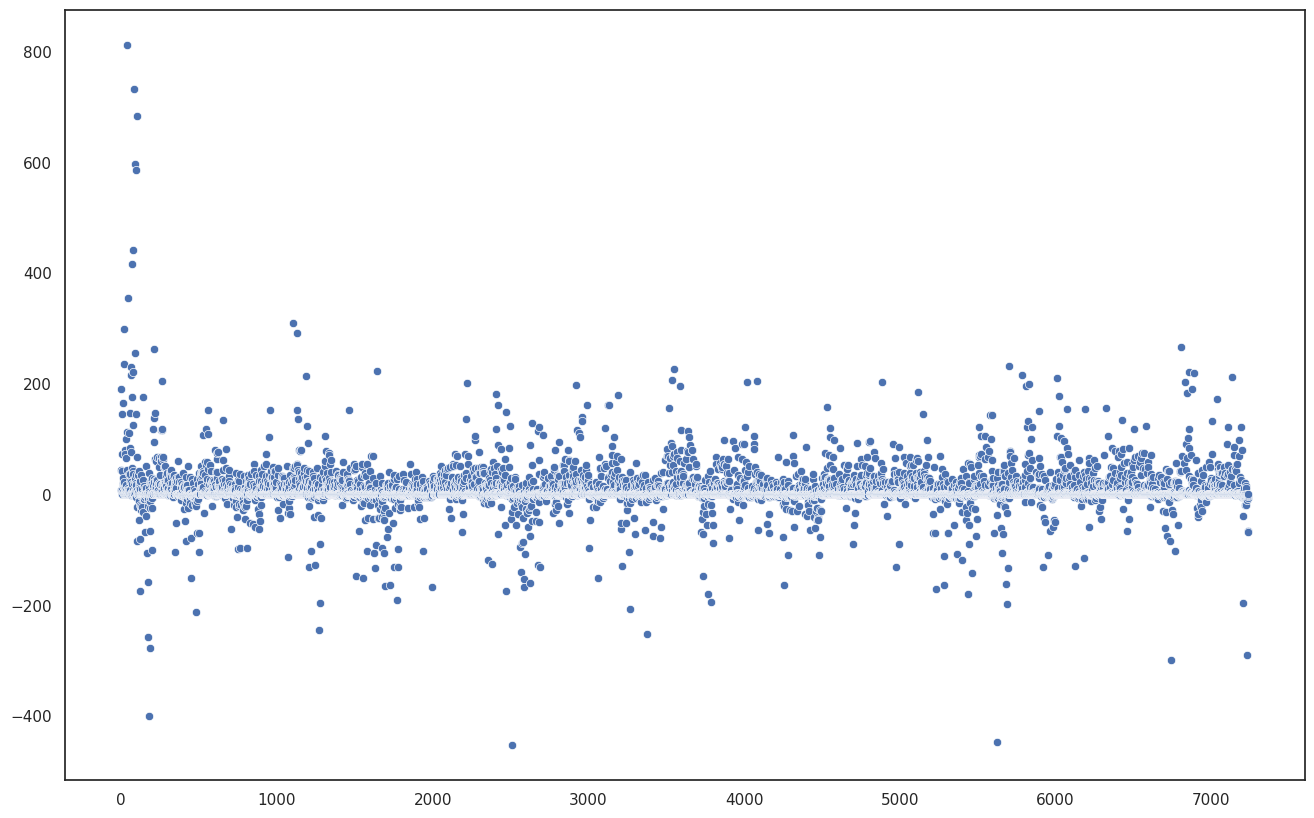

In [8]:
sns.scatterplot(e)

<Axes: ylabel='Count'>

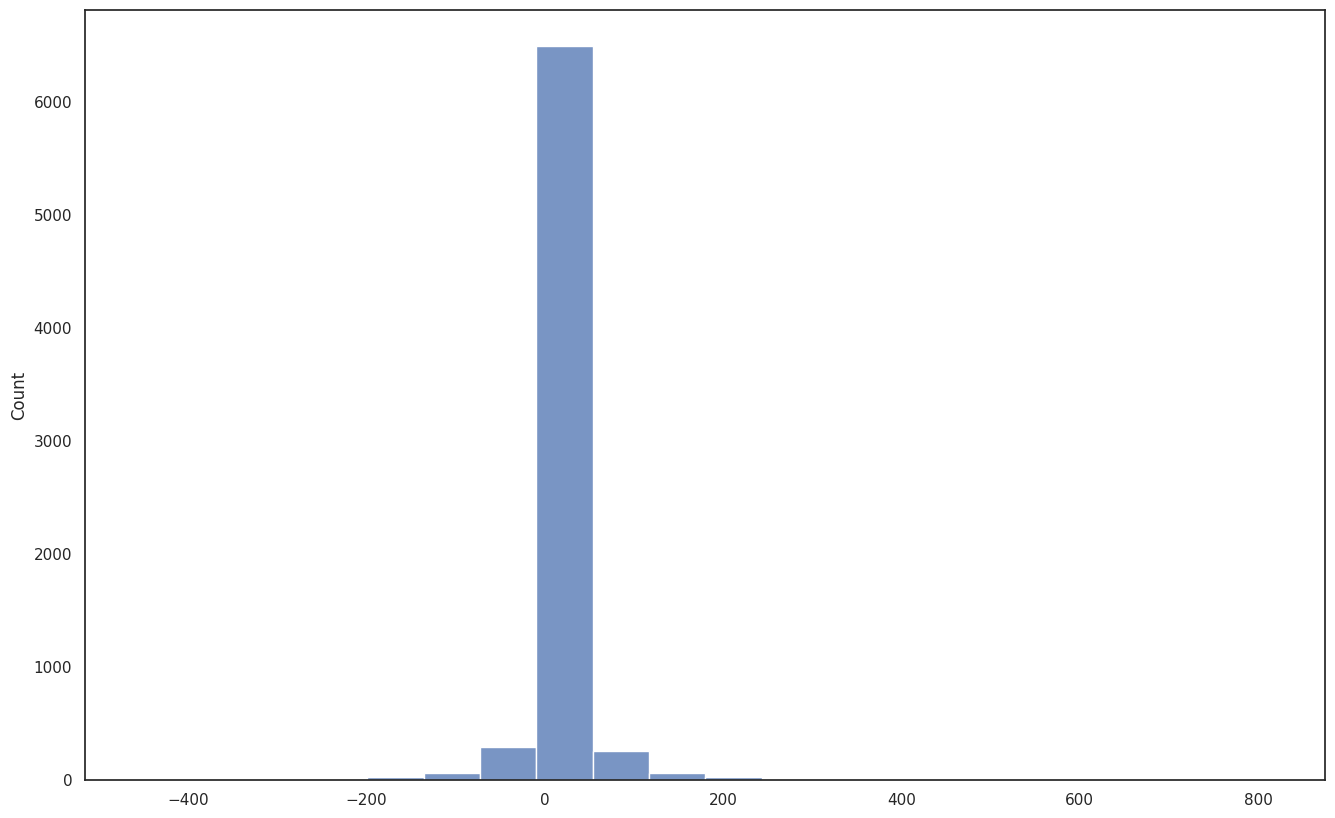

In [9]:
sns.histplot(e, bins=20)

In [10]:
e_df = pd.DataFrame(e)
e_df.columns = ["e"]

e_clean = e_df.query("-1 < e <= 1")
e_outliers = e_df.query("1 < e or e <= -1")

print("outliers", len(e_outliers))
print("near", len(e_clean))

outliers 4983
near 2257


array([[<Axes: title={'center': 'e'}>]], dtype=object)

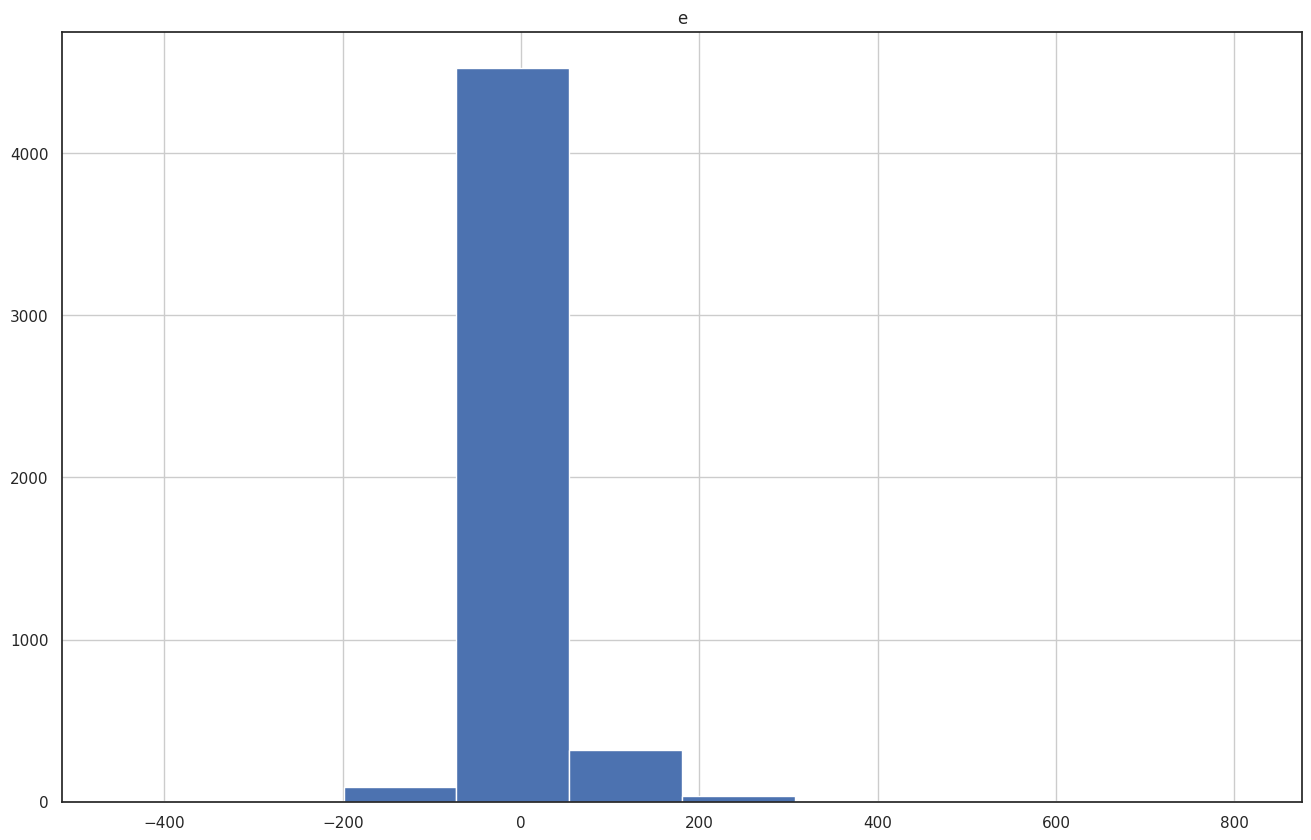

In [11]:
e_outliers.hist()

array([[<Axes: title={'center': 'e'}>]], dtype=object)

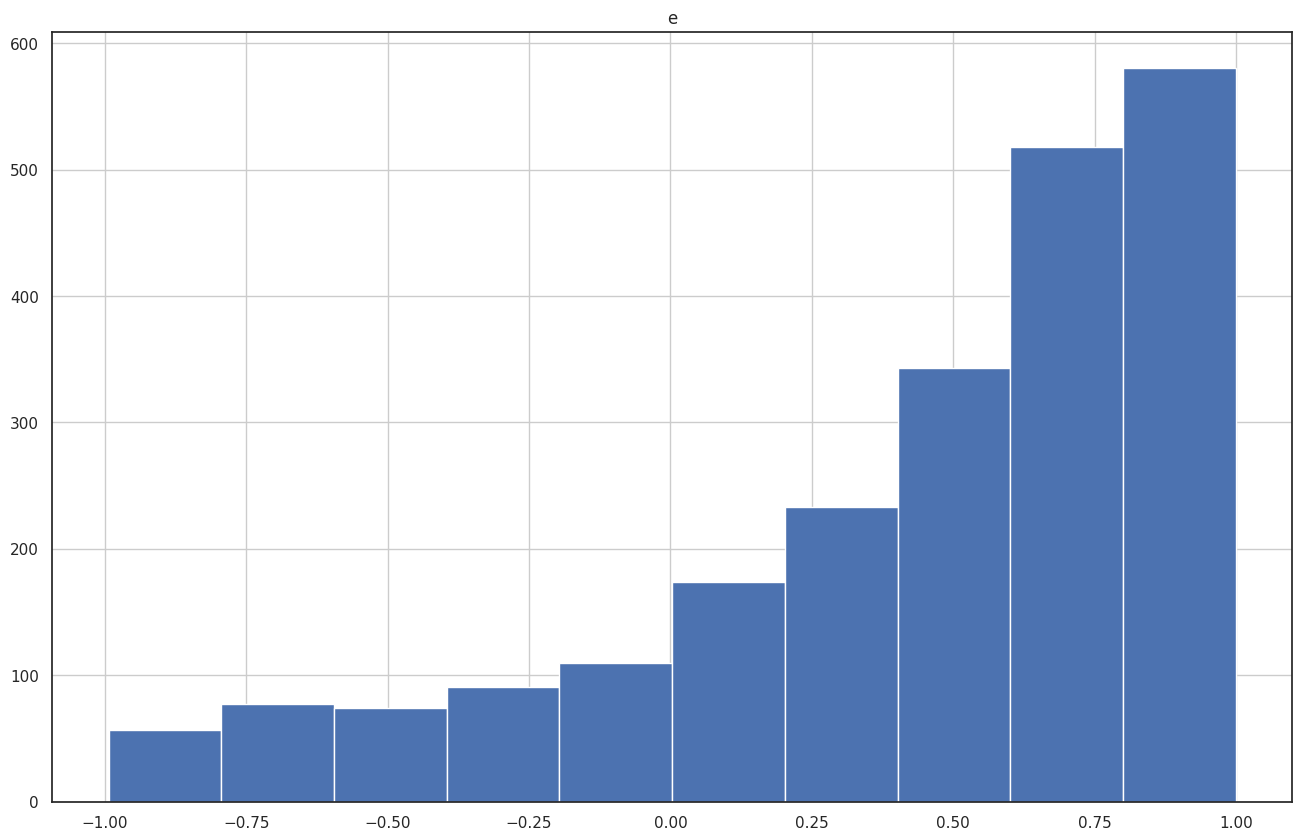

In [12]:
e_clean.hist()